# ANÁLISIS DE DATOS DEL MUNICIPIO DE MONTERREY – AÑO 2014

#### INTEGRANTES:
Alejandro Salazar

Gabriela Uquillas

## VISIÓN GENERAL DEL DATASET

In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
compras_df= pd.read_csv('clean_pago_anual.csv')

In [4]:
compras_df.head(4)

,FECHA,FACTURA,BENEFICIARIO,CONCEPTO,IMPORTE,FECHA DEL PAGO POR CADENAS,RFC
0,2014-01-31 00:00:00,388,"BUFETE URBANISTICO, S.A. DE C.V.",REHABILITACION PAVIMENTO ASFALTICO,"3,314,064.24",NaN,NaN
1,2014-01-31 00:00:00,339,GUERRERO SEGURA NESTOR,REHABILITACION GIMNASIO,"1,247,305.36",NaN,NaN
2,2014-01-31 00:00:00,77,"CONSTRUCCIONES DYNAMO, SA. DE CV.",CONST. CENTRO DE DESARROLLO DEPORTIVO,"1,521,090.52",NaN,NaN
3,2014-01-31 00:00:00,365,"CONSTRUCTORA JOMABE, SA. DE CV.",REHABILITACION GIMNASIO,"1,245,945.57",NaN,NaN


In [5]:
compras_df.columns

Index(['FECHA', 'FACTURA', 'BENEFICIARIO', 'CONCEPTO', 'IMPORTE',
       'FECHA DEL PAGO POR CADENAS', 'RFC'],
      dtype='object')

In [6]:
compras_df.dtypes

FECHA                         object
FACTURA                       object
BENEFICIARIO                  object
CONCEPTO                      object
IMPORTE                       object
FECHA DEL PAGO POR CADENAS    object
RFC                           object
dtype: object

In [7]:
compras_df.describe()

,FECHA,FACTURA,BENEFICIARIO,CONCEPTO,IMPORTE,FECHA DEL PAGO POR CADENAS,RFC
count,8982,8982,8982,8982,8982,130,5840
unique,224,7026,1725,1411,6149,12,460
top,2014-02-18 00:00:00,BCO,"CAR ONE MONTERREY, S.A. DE C.V.",COMESTIBLES,58000.0,2013-10-11,NO APLICA
freq,629,592,364,501,84,48,789


In [8]:
compras_df= compras_df[['FECHA', 'FACTURA', 'BENEFICIARIO', 'CONCEPTO', 'IMPORTE']]

In [9]:
compras_df.head(4)

,FECHA,FACTURA,BENEFICIARIO,CONCEPTO,IMPORTE
0,2014-01-31 00:00:00,388,"BUFETE URBANISTICO, S.A. DE C.V.",REHABILITACION PAVIMENTO ASFALTICO,"3,314,064.24"
1,2014-01-31 00:00:00,339,GUERRERO SEGURA NESTOR,REHABILITACION GIMNASIO,"1,247,305.36"
2,2014-01-31 00:00:00,77,"CONSTRUCCIONES DYNAMO, SA. DE CV.",CONST. CENTRO DE DESARROLLO DEPORTIVO,"1,521,090.52"
3,2014-01-31 00:00:00,365,"CONSTRUCTORA JOMABE, SA. DE CV.",REHABILITACION GIMNASIO,"1,245,945.57"


### ANÁLISIS UNIDIMENSIONAL

##### • Conteo de ocurrencia de la variable Beneficiario

In [10]:
compras_df['BENEFICIARIO'].value_counts()

BENEFICIARIO
CAR ONE MONTERREY, S.A. DE C.V.                             364
DISTRIBUIDORA DE FRUTAS Y LEGUM.LA HORTALIZA,S.A.DE C.V.    249
CHRISTUS MUGUERZA SISTEMAS HOSPITALARIOS, S.A. DE C.V.      236
SERVICIOS GASOLINEROS DE MEXICO, S.A. DE C.V.               218
PRAXAIR MEXICO S. DE R.L. DE C.V.                           173
                                                           ... 
SERV.ESTRAT. DEL NORTE EN ADMON. DE NEG.,SA. DE CV.           1
RIVEROS RODRIGUEZ MARIO                                       1
HERRERA MORENO JUAN ENRIQUE                                   1
IBARRA ARELLANO MARCO ANTONIO                                 1
EITMEDIAGLOBAL, S.A. DE C.V.                                  1
Name: count, Length: 1725, dtype: int64

##### • Cantidad de valores únicos de la variable Beneficiario

In [11]:
compras_df['BENEFICIARIO'].unique()

array(['BUFETE URBANISTICO, S.A. DE C.V.', 'GUERRERO SEGURA NESTOR',
       'CONSTRUCCIONES DYNAMO, SA. DE CV.', ...,
       'SUMINISTROS URGENTES FILTROS Y MANGUERAS, SA. DE CV         ',
       'JIMENEZ SANTACRUZ ANTONIO', 'EITMEDIAGLOBAL, S.A. DE C.V.'],
      dtype=object)

##### • Número de pagos por proveedor 

In [12]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAR ONE MONTERREY, S.A. DE C.V.                             364
DISTRIBUIDORA DE FRUTAS Y LEGUM.LA HORTALIZA,S.A.DE C.V.    249
CHRISTUS MUGUERZA SISTEMAS HOSPITALARIOS, S.A. DE C.V.      236
SERVICIOS GASOLINEROS DE MEXICO, S.A. DE C.V.               218
PRAXAIR MEXICO S. DE R.L. DE C.V.                           173
HOSP.UNIVERSITARIO DR.JOSE E.GONZALEZ                       131
MEZCLAS DE ASFALTO Y CONCRETO, S.A. DE C.V.                 129
NUEVO GAS,S.A.DE C.V.                                       120
FULL TECHNOLOGY, S.A. DE C.V.                               110
MARTINEZ SANDOVAL JOSE GILBERTO                              99
Name: count, dtype: int64

In [13]:
compras_df['IMPORTE'] = pd.to_numeric(compras_df['IMPORTE'], errors='coerce')

In [14]:
compras_df.dtypes

FECHA            object
FACTURA          object
BENEFICIARIO     object
CONCEPTO         object
IMPORTE         float64
dtype: object

##### • Análisis numérico de la variable IMPORTE mediante un histograma

<Axes: >

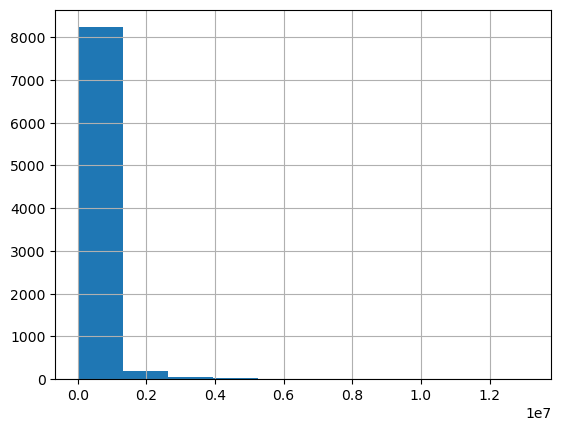

In [15]:
compras_df['IMPORTE'].hist()

##### • Histograma de los valores de la columna 'IMPORTE' filtrando previamente los importes que se encuentran por debajo del percentil 95.

<Axes: >

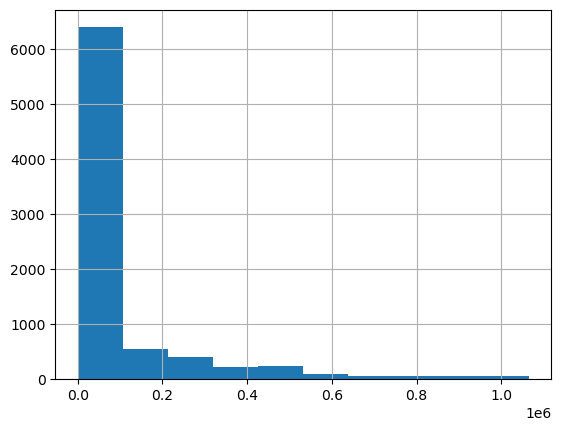

In [16]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

##### • Dividir el gráfico anterior en 30 intervalos

<Axes: >

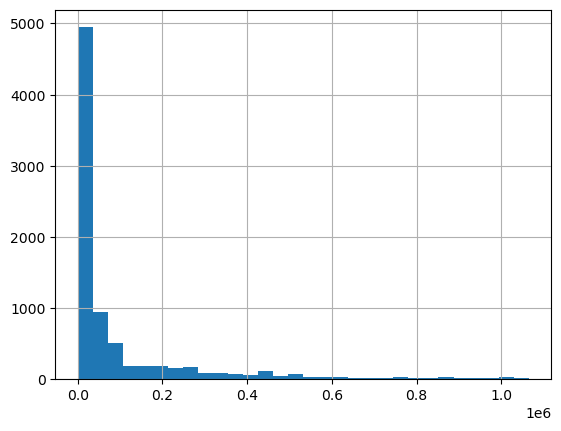

In [17]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=30)

##### • Análisis de la variable CONCEPTO

In [18]:
compras_df['CONCEPTO'].value_counts()

CONCEPTO
COMESTIBLES                                         501
MANTENIMIENTO VEHICULAR                             392
PROMOCION DE OBRAS Y ACTIVIDADES MPALES             365
PROMOCION DE ACTIVIDADES MUNICIPALES                341
INDEMNIZACION DAÑOS A VEHICULO PARTICULAR           316
                                                   ... 
DEV.MULTAS TRANSITO PLACA SMD8179                     1
DEV. MULTAS CONSTRUCCION F.1269/2010 Y 4841/2011      1
DEV. MULTA DE LIMPIA FOLIO 7503                       1
DEVOLUCION PAGO MULTAS DE TRANSITO Y VO.BO.           1
REEMBOLSO DE GASTOS DE REPRESENTACION .               1
Name: count, Length: 1411, dtype: int64

In [19]:
compras_df['CONCEPTO'].unique()

array(['REHABILITACION PAVIMENTO ASFALTICO', 'REHABILITACION GIMNASIO',
       'CONST. CENTRO DE DESARROLLO DEPORTIVO', ...,
       'APOYO TECNICO EN RECAUDACION FISCAL',
       'REEMB. GASTOS DE VIAJE Y VIATICOS A LA CD.MEXICO .',
       'REEMBOLSO DE GASTOS DE REPRESENTACION .'], dtype=object)

##### • Análisis de la variable FECHA

In [20]:
compras_df['FECHA'].value_counts()

FECHA
2014-02-18 00:00:00    629
2014-01-31 00:00:00    456
2014-03-12 00:00:00    323
2014-07-28 00:00:00    216
2014-12-29 00:00:00    184
                      ... 
2014-06-19 00:00:00      1
2014-06-25 00:00:00      1
2014-05-28 00:00:00      1
2014-11-25 00:00:00      1
2014-09-08 00:00:00      1
Name: count, Length: 224, dtype: int64

In [21]:
compras_df['FECHA'].unique()

array(['2014-01-31 00:00:00', '2014-02-24 00:00:00',
       '2014-02-05 00:00:00', '2014-02-06 00:00:00',
       '2014-02-26 00:00:00', '2014-02-18 00:00:00',
       '2014-02-07 00:00:00', '2014-02-25 00:00:00',
       '2014-02-19 00:00:00', '2014-02-13 00:00:00',
       '2014-02-10 00:00:00', '2014-02-28 00:00:00',
       '2014-02-04 00:00:00', '2014-02-27 00:00:00',
       '2014-02-20 00:00:00', '2014-02-21 00:00:00',
       '2014-02-14 00:00:00', '2014-02-12 00:00:00',
       '2014-02-17 00:00:00', '2014-02-11 00:00:00',
       '2014-03-04 00:00:00', '2014-03-26 00:00:00',
       '2014-03-28 00:00:00', '2014-03-07 00:00:00',
       '2014-03-14 00:00:00', '2014-03-24 00:00:00',
       '2014-03-31 00:00:00', '2014-03-03 00:00:00',
       '2014-03-11 00:00:00', '2014-03-12 00:00:00',
       '2014-03-19 00:00:00', '2014-03-21 00:00:00',
       '2014-03-18 00:00:00', '2014-03-27 00:00:00',
       '2014-03-20 00:00:00', '2014-03-13 00:00:00',
       '2014-03-05 00:00:00', '2014-03-06 00:0

### ANÁLISIS MULTIDIMENSIONAL

##### • Identificar los beneficiarios con mayor carga económica.

In [22]:
sum_importe_beneficiario=compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

In [23]:
sum_importe_beneficiario.head(200)

BENEFICIARIO
50 PRODUCCIONES, S.A. DE C.V.                                     852600.00
ABC Y CONSTRUCCIONES, SA. DE CV.                                  880196.22
ABRAHAM KURI ZARIFE                                                    0.00
ABUNDIS ALBERTO                                                   263430.00
ACADEMIA REGIONAL DE SEGURIDAD PUBLICA DEL NORESTE               4413400.00
                                                                   ...     
CAR ONE MONTERREY, S.A. DE C.V.                                 53596072.31
CARAZA NAVARRO JOSE ANTONIO                                            0.00
CARBAJAL PEREZ IVAN                                                 8212.29
CARDENAS ALIMENTOS, S.A. DE C.V.                                    2201.84
CARDENAS CHAVEZ DANIEL ADRIAN                                       1925.00
Name: IMPORTE, Length: 200, dtype: float64

<Axes: xlabel='BENEFICIARIO'>

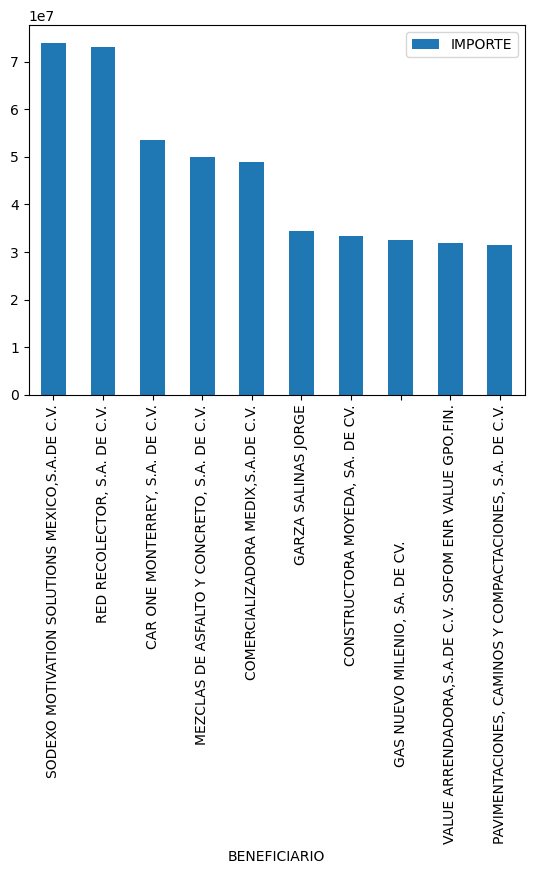

In [24]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO',y='IMPORTE')

##### • Determinar el gasto promedio por CONCEPTO

In [25]:
mean_importe_sheet=compras_df.groupby('CONCEPTO')['IMPORTE'].mean()

In [26]:
mean_importe_sheet.head(4)

CONCEPTO
 (GXC) DONATIVO HOGAR DE LA MISERICORDIA                   100000.00
 3ERA PARC.SENTENCIA RESOLUTORIA DE JUICIO CONTENCIOSO    2915047.93
 AGUA GARRAFON DE 20 LITROS                                 14950.00
 ALIMENTOS EN REUNION DE TRABAJO                             5251.00
Name: IMPORTE, dtype: float64

<Axes: xlabel='CONCEPTO'>

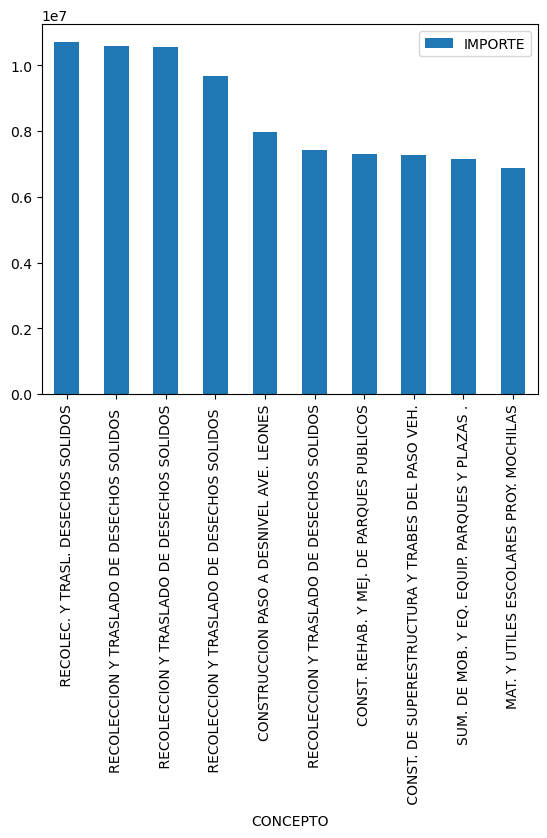

In [27]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='CONCEPTO',y='IMPORTE')

##### • Determinar los gastos por FECHA

In [28]:
sum_importe_fecha=compras_df.groupby('FECHA').sum()['IMPORTE']

<Axes: xlabel='FECHA'>

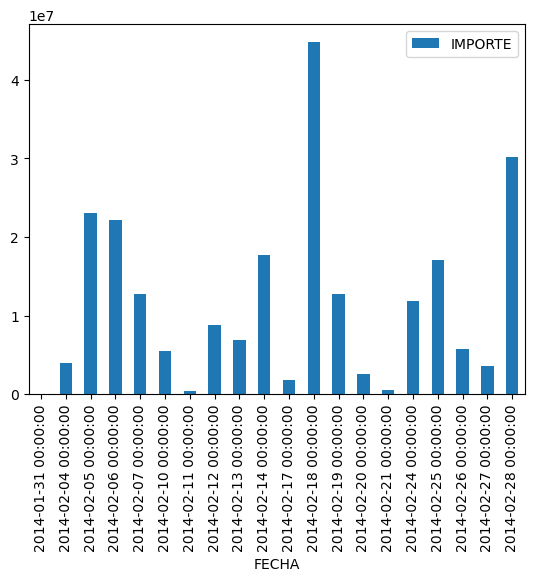

In [29]:
sum_importe_fecha.reset_index().sort_values(by='FECHA', ascending=True).iloc[0:20].plot(kind='bar', x='FECHA',y='IMPORTE')

##### • Determinar los gastos por FACTURA

In [30]:
sum_importe_fecha=compras_df.groupby('FACTURA').sum()['IMPORTE']

<Axes: xlabel='FACTURA'>

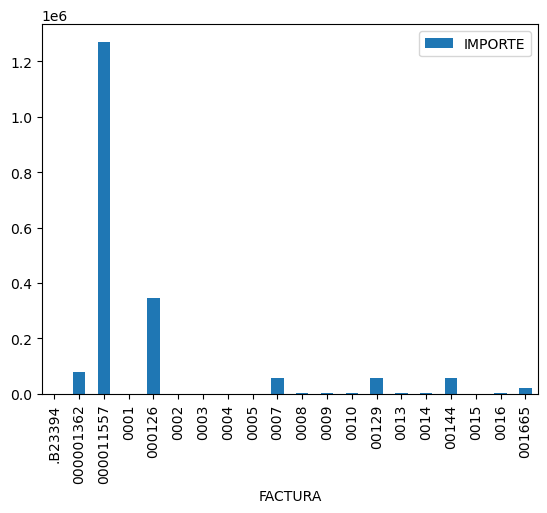

In [31]:
sum_importe_fecha.reset_index().sort_values(by='FACTURA', ascending=True).iloc[0:20].plot(kind='bar', x='FACTURA',y='IMPORTE')

## ANÁLISIS DE TEXTO

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jossu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
import nltk
from nltk.corpus import stopwords
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [34]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [35]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
texto_compras=''

In [37]:
for row in compras_df['CONCEPTO']:
    texto_compras=texto_compras+ ' '+ row

In [38]:
stopwords_list= stopwords.words('spanish')+['2014', 'MEXICO', 'CONSTRUCCION', 'GASES', 'MEDICINALES', 'VEHICULO']

In [39]:
texto_compras = ' '.join([x for x in texto_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [40]:
wc = WordCloud(background_color= 'white')
wc.generate(texto_compras)

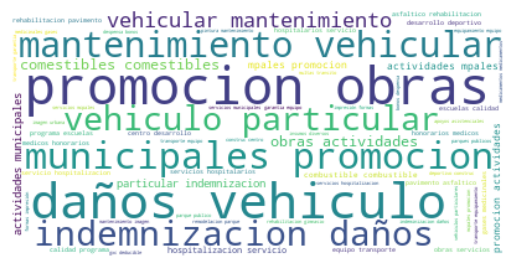

In [41]:
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()